# B.S Delta, Vega VS Pathwise SENSITIVY DELTa and Vega

## Theoretical Foundations

### 1. Stochastic Process Modeling
**Geometric Brownian Motion (GBM)**:
$$ dS_t = \mu S_t dt + \sigma S_t dW_t $$

Where:
- $S_t$: Asset price at time $t$
- $\mu$: Drift rate
- $\sigma$: Volatility
- $W_t$: Wiener process (Brownian motion)

### 2. Option Pricing Formulas

#### 2.1 Black-Scholes Option Pricing
**Core Formula**:
$$ C(S,t) = S_0 \Phi(d_1) - Ke^{-r(T-t)}\Phi(d_2) $$

**Key Components**:
- $d_1 = \frac{\ln(S_0/K) + (r + \frac{1}{2}\sigma^2)(T-t)}{\sigma\sqrt{T-t}}$
- $d_2 = d_1 - \sigma\sqrt{T-t}$
- $\Phi(\cdot)$: Cumulative standard normal distribution

#### 2.2 Sensitivity Metrics (Greeks)

##### 2.2.1 Delta (Δ)
**Analytic Delta Formula**:
$$ \Delta = \begin{cases} 
\Phi(d_1) & \text{(Call Option)} \\
\Phi(d_1) - 1 & \text{(Put Option)}
\end{cases} $$

**Pathwise Delta Estimation**:
$$ \Delta_{PW} = e^{-rT} \mathbb{E}\left[\frac{S(T)}{S_0} \cdot \mathbf{1}_{\{S(T) > K\}}\right] $$

##### 2.2.2 Gamma (Γ)
**Analytic Gamma Formula**:
$$ \Gamma = \frac{\phi(d_1)}{S_0 \sigma \sqrt{T-t}} $$
Where $\phi(\cdot)$ is the standard normal probability density function

##### 2.2.3 Vega (ν)
**Analytic Vega Formula**:
$$ \nu = S_0 \phi(d_1) \sqrt{T-t} $$

**Pathwise Vega Estimation**:
$$ \nu_{PW} = e^{-rT} \mathbb{E}\left[\mathbf{1}_{\{S(T) > K\}} \cdot \frac{S(T)}{σ} \left(\ln\left(\frac{S(T)}{S_0}\right) - \left(r + \frac{1}{2}σ^2\right)T\right)\right] $$

### 3. Monte Carlo Simulation Techniques

#### 3.1 Euler Discretization
**Discrete-time Approximation**:
$$ X_{t+1} = X_t + \left(r - \frac{1}{2}\sigma^2\right)dt + \sigma(W_{t+1} - W_t) $$

#### 3.2 Option Price Estimation
**Monte Carlo Pricing**:
$$ C = e^{-rT} \mathbb{E}[\max(S(T) - K, 0)] $$

### 4. Numerical Methods

#### 4.1 Path Generation
1. Generate standard normal random variables
2. Normalize to zero mean, unit variance
3. Construct price paths using Euler-Maruyama method

#### 4.2 Sensitivity Estimation
1. Simulate multiple price paths
2. Calculate path-dependent sensitivities
3. Compute expected values
4. Compare with analytic solutions

## Key Mathematical Insights
- Unbiased estimation of option sensitivities
- Convergence properties of Monte Carlo methods
- Importance of path normalization
- Computational efficiency of pathwise estimation

## Computational Complexity
- Time complexity: $O(N \cdot M)$
  - $N$: Number of paths
  - $M$: Number of time steps

## Numerical Stability Considerations
- Random walk normalization
- Discrete vs. continuous approximations
- Impact of path discretization

Running simulation with 5.0 paths
Running simulation with 25.0 paths
Running simulation with 46.0 paths
Running simulation with 66.0 paths
Running simulation with 86.0 paths
Running simulation with 107.0 paths
Running simulation with 127.0 paths
Running simulation with 147.0 paths
Running simulation with 167.0 paths
Running simulation with 188.0 paths
Running simulation with 208.0 paths
Running simulation with 228.0 paths
Running simulation with 249.0 paths
Running simulation with 269.0 paths
Running simulation with 289.0 paths
Running simulation with 310.0 paths
Running simulation with 330.0 paths
Running simulation with 350.0 paths
Running simulation with 371.0 paths
Running simulation with 391.0 paths
Running simulation with 411.0 paths
Running simulation with 431.0 paths
Running simulation with 452.0 paths
Running simulation with 472.0 paths
Running simulation with 492.0 paths
Running simulation with 513.0 paths
Running simulation with 533.0 paths
Running simulation with 553.0 path

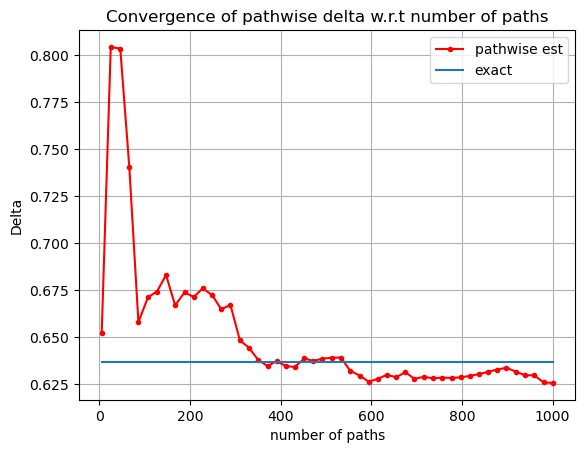

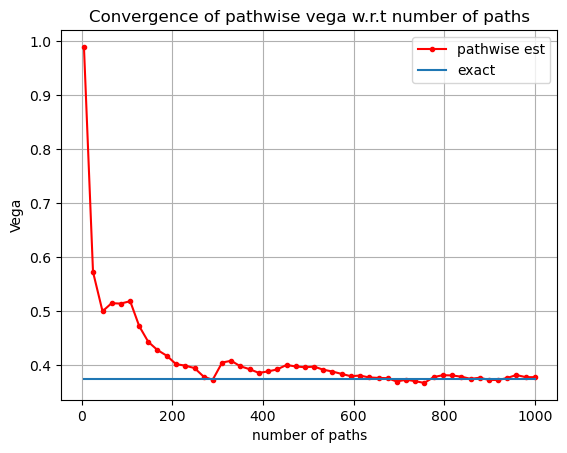

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import enum


class OptionType(enum.Enum):
    CALL = 1.0
    PUT = -1.0


def BS_Call_Put_Option_Price(CP, S_0, K, sigma, t, T, r):
    K = np.array(K).reshape([len(K), 1])
    d1 = (np.log(S_0 / K) + (r + 0.5 * np.power(sigma, 2.0)) * (T - t)) / (sigma * np.sqrt(T - t))
    d2 = d1 - sigma * np.sqrt(T - t)
    if CP == OptionType.CALL:
        value = stats.norm.cdf(d1) * S_0 - stats.norm.cdf(d2) * K * np.exp(-r * (T - t))
    elif CP == OptionType.PUT:
        value = stats.norm.cdf(-d2) * K * np.exp(-r * (T - t)) - stats.norm.cdf(-d1) * S_0
    return value


def BS_Delta(CP, S_0, K, sigma, t, T, r):
    K = np.array(K).reshape([len(K), 1])
    d1 = (np.log(S_0 / K) + (r + 0.5 * np.power(sigma, 2.0)) * (T - t)) / (sigma * np.sqrt(T - t))
    if CP == OptionType.CALL:
        value = stats.norm.cdf(d1)
    elif CP == OptionType.PUT:
        value = stats.norm.cdf(d1) - 1
    return value


def BS_Gamma(S_0, K, sigma, t, T, r):
    K = np.array(K).reshape([len(K), 1])
    d1 = (np.log(S_0 / K) + (r + 0.5 * np.power(sigma, 2.0)) * (T - t)) / (sigma * np.sqrt(T - t))
    return stats.norm.pdf(d1) / (S_0 * sigma * np.sqrt(T - t))


def BS_Vega(S_0, K, sigma, t, T, r):
    d1 = (np.log(S_0 / K) + (r + 0.5 * np.power(sigma, 2.0)) * (T - t)) / (sigma * np.sqrt(T - t))
    return S_0 * stats.norm.pdf(d1) * np.sqrt(T - t)


def GeneratePathsGBMEuler(NoOfPaths, NoOfSteps, T, r, sigma, S_0):
    Z = np.random.normal(0.0, 1.0, [NoOfPaths, NoOfSteps])
    S = np.zeros([NoOfPaths, NoOfSteps + 1])
    W = np.zeros([NoOfPaths, NoOfSteps + 1])
    S[:, 0] = np.log(S_0)
    X = np.zeros([NoOfPaths, NoOfSteps + 1])
    X[:, 0] = np.log(S_0)
    time = np.zeros([NoOfSteps + 1])
    dt = T / float(NoOfSteps)
    for i in range(0, NoOfSteps):
        if NoOfPaths > 1:
            Z[:, i] = (Z[:, i] - np.mean(Z[:, i])) / np.std(Z[:, i])
        W[:, i + 1] = W[:, i] + np.power(dt, 0.5) * Z[:, i]
        X[:, i + 1] = X[:, i] + (r - 0.5 * sigma ** 2.0) * dt + sigma * (W[:, i + 1] - W[:, i])
        time[i + 1] = time[i] + dt
    paths = {"time": time, "S": np.exp(X)}
    return paths


def EUOptionPriceFromMCPathsGeneralized(CP, S, K, T, r):
    # S is a vector of Monte Carlo samples at T
    result = np.zeros([len(K), 1])
    if CP == OptionType.CALL:
        for (idx, k) in enumerate(K):
            result[idx] = np.exp(-r * T) * np.mean(np.maximum(S - k, 0.0))
    elif CP == OptionType.PUT:
        for (idx, k) in enumerate(K):
            result[idx] = np.exp(-r * T) * np.mean(np.maximum(k - S, 0.0))
    return result


def PathWiseDelta(S0, S, K, sigma, r, T):
    temp1 = S[:, -1] > K

    return np.exp(-r * T) * np.mean(S[:, -1] / S0 * temp1)


def PathwiseVega(S0, S, sigma, K, r, T):
    temp1 = S[:, -1] > K
    temp2 = 1.0 / sigma * S[:, -1] * (np.log(S[:, -1] / S0) - (r + 0.5 * sigma ** 2.0) * T)
    return np.exp(-r * T) * np.mean(temp1 * temp2)


def mainCalculation():
    CP = OptionType.CALL
    S0 = 1
    r = 0.06
    sigma = 0.3
    T = 1
    K = np.array([S0])
    t = 0.0

    NoOfSteps = 1000

    delta_Exact = BS_Delta(CP, S0, K, sigma, t, T, r)
    vega_Exact = BS_Vega(S0, K, sigma, t, T, r)

    NoOfPathsV = np.round(np.linspace(5, 1000, 50))
    deltaPathWiseV = np.zeros(len(NoOfPathsV))
    vegaPathWiseV = np.zeros(len(NoOfPathsV))

    for (idx, nPaths) in enumerate(NoOfPathsV):
        print('Running simulation with {0} paths'.format(nPaths))
        np.random.seed(3)
        paths1 = GeneratePathsGBMEuler(int(nPaths), NoOfSteps, T, r, sigma, S0)
        S = paths1["S"]
        delta_pathwise = PathWiseDelta(S0, S, K, sigma, r, T)
        deltaPathWiseV[idx] = delta_pathwise

        vega_pathwise = PathwiseVega(S0, S, sigma, K, r, T)
        vegaPathWiseV[idx] = vega_pathwise

    plt.figure(1)
    plt.grid()
    plt.plot(NoOfPathsV, deltaPathWiseV, '.-r')
    plt.plot(NoOfPathsV, delta_Exact * np.ones([len(NoOfPathsV), 1]))
    plt.xlabel('number of paths')
    plt.ylabel('Delta')
    plt.title('Convergence of pathwise delta w.r.t number of paths')
    plt.legend(['pathwise est', 'exact'])

    plt.figure(2)
    plt.grid()
    plt.plot(NoOfPathsV, vegaPathWiseV, '.-r')
    plt.plot(NoOfPathsV, vega_Exact * np.ones([len(NoOfPathsV), 1]))
    plt.xlabel('number of paths')
    plt.ylabel('Vega')
    plt.title('Convergence of pathwise vega w.r.t number of paths')
    plt.legend(['pathwise est', 'exact'])


mainCalculation()
